# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Запускаем библиотеку пандас для работы с таблицами.
import pandas as pd
#Запускает бибилиотеку matplotlib для построение гистрограм.
import matplotlib.pyplot as plt
#Запускаем библиотеку numpy для работы с массивами
import numpy as np 

In [2]:
# Прочитали фаил таблицы csv,сделали разделение столбцов методом sep и присвоили переменной data 
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Просмотрели информацию о таблице количество: строчек, столбцов и пропусков в столбцах и их типы
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#Открыли таблицу для дальнейшей работы
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
#Смотрим какие значения у нас есть в датасете нашем , средние, минимальные максимальные.
#Выявили столбец rooms, который имеет 0 комнат(обработаем позже)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
#Вывели сумму пропуском в каждом столбце и отсортировали,
#чтобы удобно обрабатывать от меньшего к большему 
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [7]:
#Проверили данные на явные дубликаты. не выявлено. 
data.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

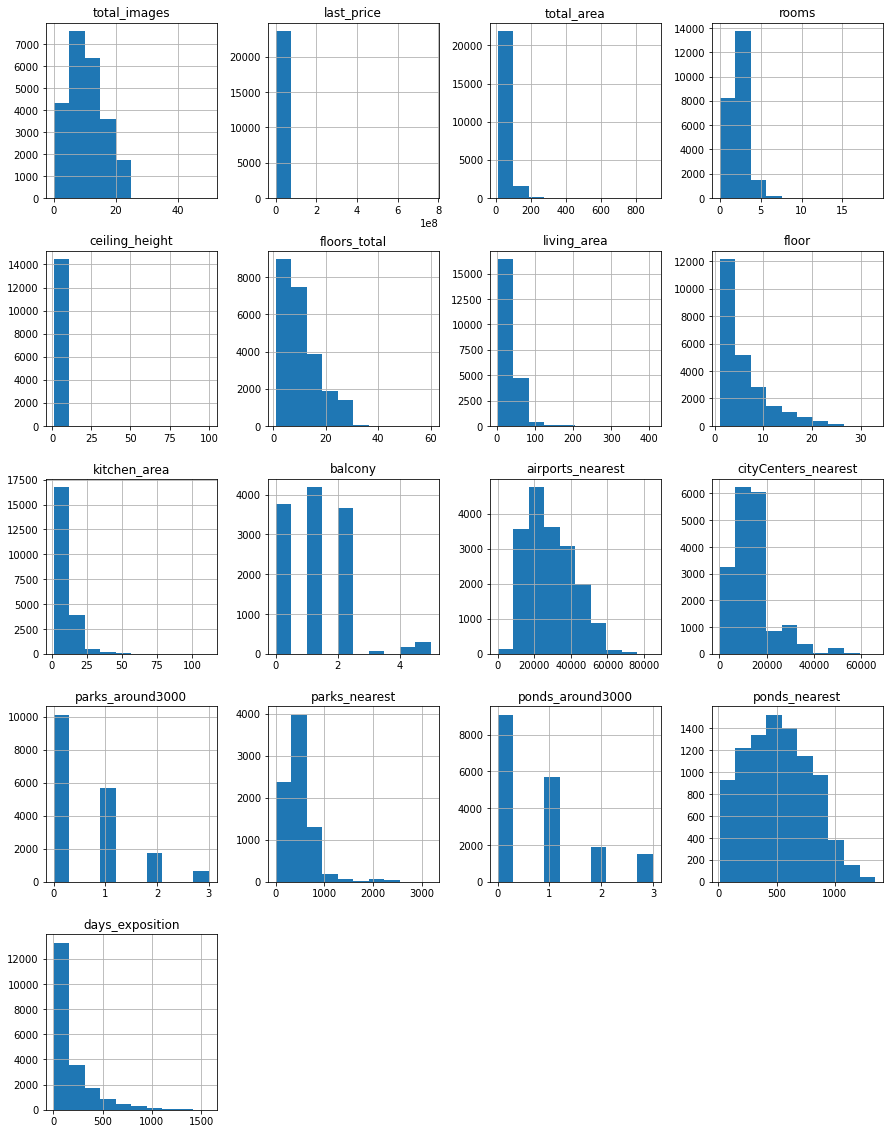

In [8]:
#Построили гистрограмму по каждому столбцу таблицы data
data.hist(figsize=(15, 20))

                                         Вывод
-Имеем пропущенных значений от 50 штук  до 20 тысяч в разных столбцах, надо детально изучать каждый столбец с пропусками.

-cityCenters_nearest - нужно привести к общему регистру и добавить в чем измеряется. данные берем из описания данных

-Столбцы: парки, пруды, до центра и аэропорта - надо добавить что расстояние указано в метрах для удобства. информацию берем из описания данных

-Столбцы пруды3000 и парки3000 -число водоёмов в радиусе 3 км , добавим км в описания столбцов.

-Столбцы kitchen_area, living_area и total_area - добавим описание что измерение в м2


### Предобработка данных

In [9]:
#Перемеименуем колонки для общего удобства работы с данными  и проверим что переименовались data.info() 
data = data.rename(columns = {'cityCenters_nearest': 'citycenters_nearest_meters',
                      'parks_around3000': 'parks_around3000_km',
                      'ponds_around3000': 'ponds_around3000_km',
                       'parks_nearest': 'parks_nearest_meters',
                       'ponds_nearest': 'ponds_nearest_meters',
                        'kitchen_area': 'kitchen_area_m2',
                        'living_area': 'living_area_m2',
                         'total_area': 'total_area_m2' })
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23699 non-null  int64  
 1   last_price                  23699 non-null  float64
 2   total_area_m2               23699 non-null  float64
 3   first_day_exposition        23699 non-null  object 
 4   rooms                       23699 non-null  int64  
 5   ceiling_height              14504 non-null  float64
 6   floors_total                23613 non-null  float64
 7   living_area_m2              21796 non-null  float64
 8   floor                       23699 non-null  int64  
 9   is_apartment                2775 non-null   object 
 10  studio                      23699 non-null  bool   
 11  open_plan                   23699 non-null  bool   
 12  kitchen_area_m2             21421 non-null  float64
 13  balcony                     121

In [10]:
#Новые данные с переименнованными столбацми, работаем с ними
data.head(20)

,total_images,last_price,total_area_m2,first_day_exposition,rooms,ceiling_height,floors_total,living_area_m2,floor,is_apartment,...,kitchen_area_m2,balcony,locality_name,airports_nearest,citycenters_nearest_meters,parks_around3000_km,parks_nearest_meters,ponds_around3000_km,ponds_nearest_meters,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [11]:
#Снова выводим пропуски и начнем их обрабатывать
data.isna().sum().sort_values()

total_images                      0
open_plan                         0
floor                             0
rooms                             0
studio                            0
total_area_m2                     0
last_price                        0
first_day_exposition              0
locality_name                    49
floors_total                     86
living_area_m2                 1903
kitchen_area_m2                2278
days_exposition                3181
ponds_around3000_km            5518
parks_around3000_km            5518
citycenters_nearest_meters     5519
airports_nearest               5542
ceiling_height                 9195
balcony                       11519
ponds_nearest_meters          14589
parks_nearest_meters          15620
is_apartment                  20924
dtype: int64

In [12]:
#Гипотеза - очень странно что пропущено 49 мест проживания людей? Они не знают где живут?
#Выведем уникальные значения locality_name 
#Огромный спискок- самая большая в нем проблема это возможно буква е и ё. 
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
# заменили ё на e и приведли к одному виду все , без regex=True неработало. взял с pandas.pydata.org
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)
#Проверили все заменилось
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [14]:
#Пропуски так и остались но данные не будут групироваться в разные строки зависимости от ё и е 
data['locality_name'].isna().sum()

49

In [15]:
#Принято решение удалить 49 строк так как мы не знаем место положение квартир
data = data.dropna(subset=['locality_name'])
#Проверили, пропусков больше нету 
data['locality_name'].isna().sum()

0

In [16]:
#Первое что можно увидеть формат floors_total - float64,
#этажи это целые числа, надо сделать формат int
#Гипотеза - значений в которых нет этажей очень мало. очень странно что их не заполнили
#Медианой такие значение, наверно заполнять будет не верно , их проще отбросить.
#посмотрели уникальные значения
data['floors_total'].unique()
data = data.dropna(subset=['floors_total'])
#Поменяли тип данных
data['floors_total'] = data['floors_total'].astype('int')
#Проверили что тип данных сменился
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23565 non-null  int64  
 1   last_price                  23565 non-null  float64
 2   total_area_m2               23565 non-null  float64
 3   first_day_exposition        23565 non-null  object 
 4   rooms                       23565 non-null  int64  
 5   ceiling_height              14481 non-null  float64
 6   floors_total                23565 non-null  int64  
 7   living_area_m2              21700 non-null  float64
 8   floor                       23565 non-null  int64  
 9   is_apartment                2760 non-null   object 
 10  studio                      23565 non-null  bool   
 11  open_plan                   23565 non-null  bool   
 12  kitchen_area_m2             21343 non-null  float64
 13  balcony                     120

В data.describe() я заметил, что колоне rooms, есть значение равно 0.
Гипотеза состоит в том, что не может быть комнат 0, мы изучаем данные по жилым помещение.
Средний м2 у жилого помещения со значение 0 равен 18.8 м2, а средне значение у жилого помещения равен 17.8 м2
Предлагаю обьеденить жилые помещения которые имеют 0 комнат и 1 комнату.

In [17]:
#Уведились что есть значение равное 0
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [18]:
# Заменили значение 0 комнат на 1 комнату
data['rooms'] = data['rooms'].replace(0, 1)
#Проверили что значения 0 комнат больше нету
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [19]:
#Можем заполнить пропуски living_area_m2 средним по rooms , чем больше комнат тем больше жилая.
data['rooms'].unique()
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area_m2'].isna()), 'living_area_m2'] = \
    data.loc[(data['rooms'] == t), 'living_area_m2'].median()
#Пропусков нету
data['living_area_m2'].isna().sum() 

0

In [20]:
#Можем сгрупировать rooms и living_area_m2, посмотреть логично ли выглядит групировка.
rooms_living_area_m2 = data.pivot_table(index='rooms',values='living_area_m2', aggfunc=['count','median'])
#Жилые помещения увеличивают  жилую площадь в зависисти от количества комнат. Все выглядит как в жизни.
rooms_living_area_m2

,count,median
,living_area_m2,living_area_m2
rooms,,
1,8198,17.600
2,7897,30.500
3,5779,45.000
4,1172,63.650
5,325,91.785
6,104,124.400
7,59,145.000
8,12,161.000


In [21]:
#Заполним kitchen_area_m2 средним как делали с living_area_m2 через rooms и сделаем сводную таблицу.
#Посмотрим на сколько значение укладываются в норму мира 
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['kitchen_area_m2'].isna()), 'kitchen_area_m2'] = \
    data.loc[(data['rooms'] == t), 'kitchen_area_m2'].median()
#Проверили нет пустых значений    
data['kitchen_area_m2'].isna().sum()

0

In [22]:
#Строим сводную таблицу проверим на сколько значения выглядт логичными
rooms_kitchen_area_m2 = data.pivot_table(index='rooms', values='kitchen_area_m2',
                                         aggfunc=['median','count'])
#Заполненые пустые данные выглядят реально 
rooms_kitchen_area_m2

,median,count
,kitchen_area_m2,kitchen_area_m2
rooms,,
1,9.00,8198
2,8.70,7897
3,9.50,5779
4,11.00,1172
5,15.10,325
6,19.75,104
7,20.00,59
8,25.00,12


У нас есть попуски в days_exposition(сколько дней было размещено объявление (от публикации до снятия))

Гипотеза - мы заполнить пропуски через rooms, так как в data.describe() видно очень интересную зависимость 
1 комната, обьявление висело в среднем 45 дней
2 комнаты, обьявление висело в среднем 90 дней
3 комнаты, обьявление висело в среднем 232 дня
При среднем значении 2 комнаты обьявление висит 180 дней. 
Данные очень реалистичные, чем меньше комнат, тем выше ликвидность жилого помещения на рынке и данное суждение верно и наоборот, чем больше комнат тем ликвидность ниже. 


In [23]:
#Заполним days_exposition средним значением через rooms, как делали выше с kitchen_area_m2
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['days_exposition'].isna()), 'days_exposition'] = \
    data.loc[(data['rooms'] == t), 'days_exposition'].median()
#Проверили нет пустых значений    
data['days_exposition'].isna().sum()

0

In [24]:
#Изменим тип days_exposition они сейча float64, а дни это целые числа, значит сделаем int64
data['days_exposition'] = data['days_exposition'].astype('int')
#Проверяем замену типа данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23565 non-null  int64  
 1   last_price                  23565 non-null  float64
 2   total_area_m2               23565 non-null  float64
 3   first_day_exposition        23565 non-null  object 
 4   rooms                       23565 non-null  int64  
 5   ceiling_height              14481 non-null  float64
 6   floors_total                23565 non-null  int64  
 7   living_area_m2              23565 non-null  float64
 8   floor                       23565 non-null  int64  
 9   is_apartment                2760 non-null   object 
 10  studio                      23565 non-null  bool   
 11  open_plan                   23565 non-null  bool   
 12  kitchen_area_m2             23565 non-null  float64
 13  balcony                     120

Гипотеза
Столбцы ponds_around3000_km и parks_around3000_km имеют одинаковое значение пропущенных значений по 5518 строк.
Также в столбцах ponds_around3000_km и parks_around3000_km есть значение 0.
Предпологаемое решение
Раз люди не указали сколько в радиусе 3км есть прудов или парков значит пустые значения равны 0.
Предогаю значения nan заполнить нулями, а столбцы переименовать.


In [25]:
#Заполнили значения nan нулевыми значениями
data['parks_around3000_km'] = data['parks_around3000_km'].fillna(0)
data['ponds_around3000_km'] = data['ponds_around3000_km'].fillna(0)

In [26]:
# Проведен тест если вычесть столбец parks_around3000_km из ponds_around3000_km значения будет равно 0,
# значит они дублируют друг друга
test = data['parks_around3000_km'] - data['ponds_around3000_km']
test.unique().sum()

0.0

In [27]:
del data['ponds_around3000_km']
data = data.rename(columns ={'parks_around3000_km': 'number_parksponds_around3000_km'})
data['number_parksponds_around3000_km'] = data['number_parksponds_around3000_km'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_images                     23565 non-null  int64  
 1   last_price                       23565 non-null  float64
 2   total_area_m2                    23565 non-null  float64
 3   first_day_exposition             23565 non-null  object 
 4   rooms                            23565 non-null  int64  
 5   ceiling_height                   14481 non-null  float64
 6   floors_total                     23565 non-null  int64  
 7   living_area_m2                   23565 non-null  float64
 8   floor                            23565 non-null  int64  
 9   is_apartment                     2760 non-null   object 
 10  studio                           23565 non-null  bool   
 11  open_plan                        23565 non-null  bool   
 12  kitchen_area_m2   

In [28]:
data['parks_nearest_meters'] = data['parks_nearest_meters'].fillna(0)
data['ponds_nearest_meters'] = data['ponds_nearest_meters'].fillna(0)

In [29]:
test = data['parks_nearest_meters'] - data['ponds_nearest_meters']
test.unique().sum()

-63593.0

### Проведите исследовательский анализ данных

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод